In [1]:
import autoencoder.adversarial as aae
import autoencoder.utils as utils 
import autoencoder.cluster_layer as clay

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
esize = [(64,3), (128, 3), (256,3)]
dsize = list(reversed(esize))

params =dict()

params['nclusters'] = 20
params['width'] = 32
params['height'] = 32
params['nchannels'] = 4
params['channels'] = [0,1,3,4]
params['nepochs'] = 20
params['batchsize'] = 256
params['learning_rate'] = 0.0005
params['restore'] = False
params['latent_size'] = 256
params['enc_sizes'] = esize 
params['dec_sizes'] = dsize
params['droprate'] = 0.85
params['stdev'] = 0.04
params['denoise'] = False
params['slam'] = 0

datadir = "/media/cjw/Data/cyto/mmCompensatedTifs/"
cpf = "/media/cjw/Data/cyto/Checkpoints/2018-09-05-10-58-21_idec_try_3/"
cpf += "checkpoint-2018-09-05-10-58-21/autoencoder-256x-20000"
cpd = ""

In [3]:
rl = aae.aae_loader(params, datadir, cpf, cpd)

In [4]:
rl.load()


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 4), dtype=float32) (?, 32, 32, 4)
isize:  4 32
dh0 (?, 32, 32, 4)
[<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 4, 64) dtype=float32_ref>, <tf.Variable 'encoder/filter_00/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'encoder/filter_02/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>, <tf.Variable 'encoder/filter_02/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/kernel:0' shape=(4096, 256) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'decoder/dense/kernel:0' shape=(256, 4096) dtype=float32_ref>, <tf.Variable 'decoder/dense/bias:0' shape=(4096,) dtype=float32_ref>, <tf.Variable 'decoder/conv2d_transpose/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>, <tf.Variable

(12000, 32, 32, 4)
original clusters
[ 396  646 1159  507  862  376  308  180  822  690  396  156  589  814
  500  848  937  566  283  965]


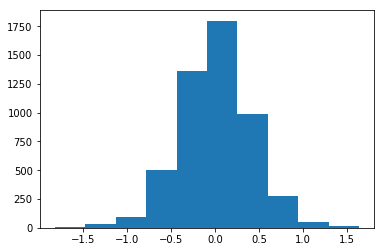

building cluster layer (?, 256)
after input_spec
20 256 <class 'int'> float32
(20, 256)
(20, 256)
done building
CALL  (?, 20) (?, 1, 256)
0 2.9320073 1.348688
[ 465  956 1060  595 1060  308  275  191  964  501  302  163  902 1259
  509  609  507  386  305  683]
0.23166666666666666
1000 2.6403797 1.8100437
[ 464  988  965  642 1074  231  217  183 1134  415  207  151  883 2421
  458  301  230  235  318  483]
0.2585
2000 2.3412201 1.9506854
[ 483 1047  884  740 1050  190  197  177 1000  367  203  138  683 3050
  463  253  158  206  261  450]
0.20708333333333334
3000 1.9745787 1.698406
[ 485 1174  805  815  999  170  188  177  895  351  204  120  482 3529
  425  231  115  185  221  429]
0.20566666666666666
4000 1.913789 1.7437863
[ 466 1154  667  783 1013  151  178  169  914  357  199  119  355 4005
  403  209   95  179  189  395]
0.2045
5000 1.9881929 1.862534
[ 416 1138  578  793  932  126  174  165  936  358  193  103  280 4437
  371  191   93  166  187  363]
0.20033333333333334
6000 1.

[ 247  628  281  819  915    2   72   60 1134  141   71   24  205 6969
  178   53   33   37   72   59]
0.16725
57000 1.4128286 1.3744825
[ 254  606  287  844  922    5   69   59 1136  132   82   19  191 6959
  186   45   29   41   72   62]
0.16841666666666666
58000 1.418361 1.3852348
[ 242  615  291  822  917    3   68   55 1124  140   80   27  184 7021
  177   50   26   39   60   59]
0.16716666666666666
59000 1.3914632 1.3548647
[ 233  618  300  856  893    3   66   60 1086  137   79   20  178 7062
  176   49   26   36   67   55]
0.15991666666666668
60000 1.3798205 1.3464459
[ 243  625  291  841  896    4   74   58 1106  129   76   18  180 7051
  179   46   30   31   60   62]
0.16183333333333333
61000 1.3927009 1.3567568
[ 230  588  294  791  924    3   66   55 1112  125   71   15  186 7129
  180   45   33   34   68   51]
0.16233333333333333
62000 1.3508581 1.316246
[ 239  588  298  822  914    3   61   61 1121  132   79   21  187 7070
  174   48   28   27   71   56]
0.160583333333333

In [5]:
cluster = clay.cluster_train(rl)

In [101]:
b = utils.get_sample(rl.mmdict, rl.df, 4000, 32, 4, [0,1,3,4])

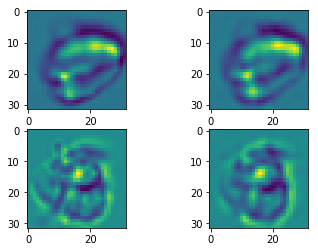

In [102]:
z = rl.encoder.eval({rl.images:b}, session=rl.sess)
dc = rl.decoder.eval({rl.encoder:z}, session=rl.sess)

index = 0
c = 0
dr = np.squeeze(dc[index,:,:,c])
plt.subplot(2,2,1)
plt.imshow(b[index,:,:,c])
plt.subplot(2,2,2)
plt.imshow(dr)

dr = np.squeeze(dc[index + 1,:,:,c])
plt.subplot(2,2,3)
plt.imshow(b[index + 1,:,:,c])
plt.subplot(2,2,4)
plt.imshow(dr)

In [103]:
import numpy as np
res = cluster.eval({rl.images:b}, session = rl.sess)


In [142]:
n19 = (np.argmax(res, axis=1) == 6)
ni = np.where(n19)[0]
print(len(ni))

23


11


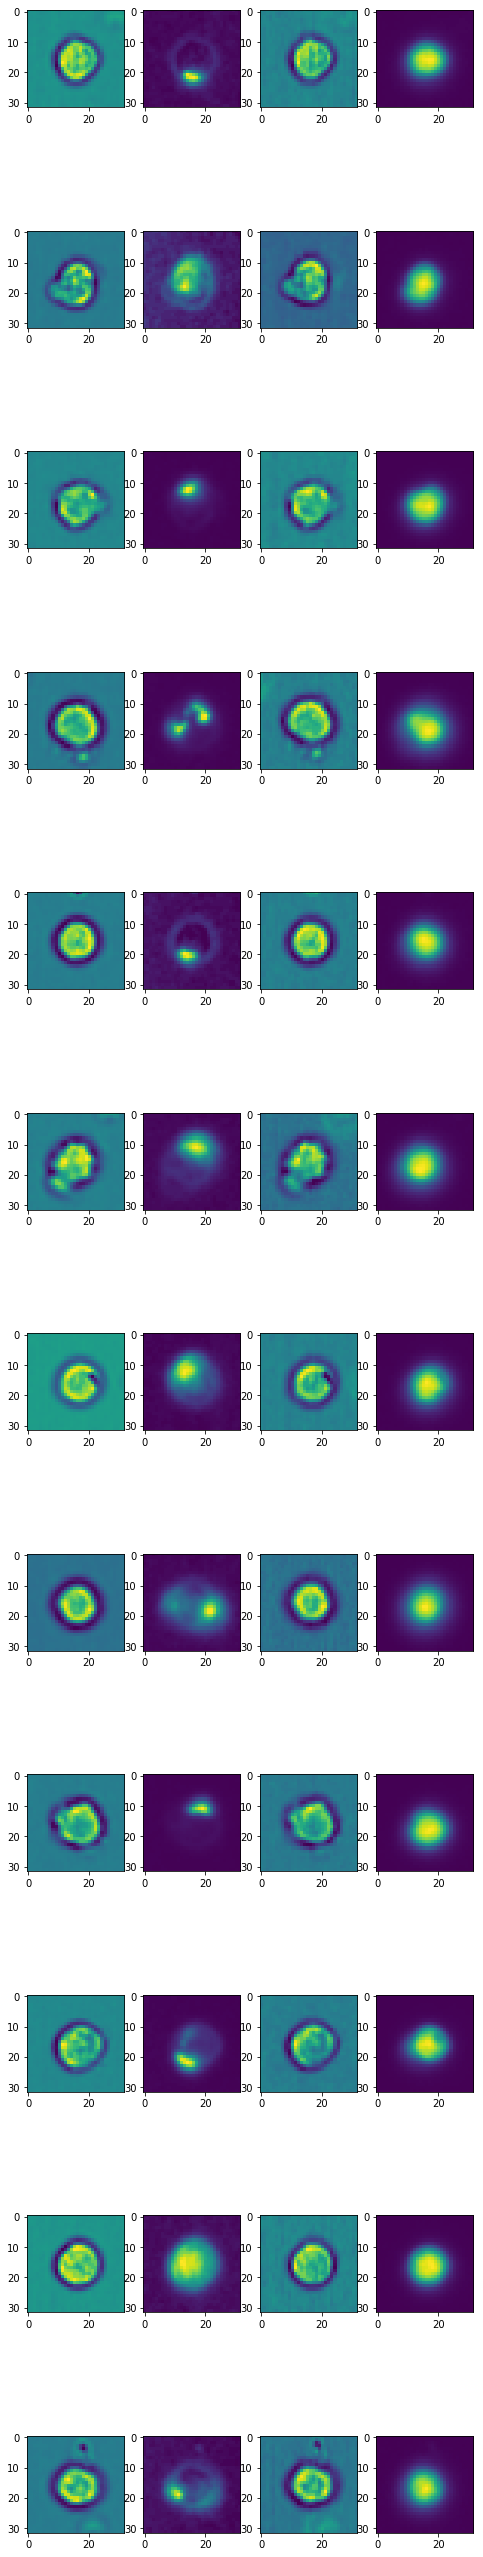

In [143]:
nr = len(ni)
if nr > 12:
    nr = 12
nc = 1
plt.figure(figsize=(8,nr*4))
for ie, i in enumerate(ni):
    #print(i)
    plt.subplot(nr,4,nc)
    nc +=1
    plt.imshow(b[i,:,:,0])
    
    plt.subplot(nr,4,nc)
    nc +=1
    plt.imshow(b[i,:,:,1])
    
    plt.subplot(nr,4,nc)
    nc +=1
    plt.imshow(b[i,:,:,2])
    
    plt.subplot(nr,4,nc)
    nc +=1
    plt.imshow(b[i,:,:,3])
    if ie >= 11:
        print(ie)
        break
    
    
    

(array([3.000e+00, 4.000e+00, 1.700e+01, 2.500e+01, 4.800e+01, 1.140e+02,
        2.460e+02, 3.480e+02, 5.350e+02, 7.590e+02, 1.081e+03, 1.305e+03,
        1.512e+03, 1.645e+03, 1.656e+03, 1.678e+03, 1.757e+03, 1.851e+03,
        2.083e+03, 2.390e+03, 2.680e+03, 3.108e+03, 3.235e+03, 3.649e+03,
        4.450e+03, 5.200e+03, 5.625e+03, 5.512e+03, 5.411e+03, 5.068e+03,
        4.500e+03, 3.532e+03, 2.663e+03, 1.998e+03, 1.467e+03, 1.031e+03,
        6.670e+02, 4.400e+02, 2.920e+02, 1.500e+02, 9.400e+01, 6.100e+01,
        3.500e+01, 2.700e+01, 2.700e+01, 6.000e+00, 8.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00]),
 array([0.04383695, 0.04408778, 0.04433861, 0.04458945, 0.04484028,
        0.04509111, 0.04534195, 0.04559278, 0.04584362, 0.04609445,
        0.04634528, 0.04659612, 0.04684695, 0.04709778, 0.04734862,
        0.04759945, 0.04785028, 0.04810112, 0.04835195, 0.04860278,
        0.04885362, 0.04910445, 0.04935528, 0.04960612, 0.04985695,
        0.05010778, 0.05035862, 0.05

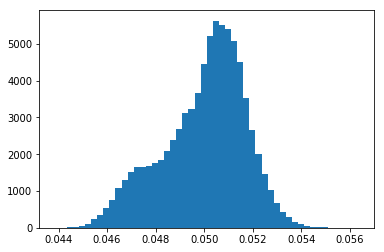

In [136]:
plt.hist(np.reshape(res, (-1)), bins=50)

In [18]:
q = cluster.call(rl.encoder)
qv = q.eval({rl.encoder:z}, session=rl.sess)
p = clay.cluster_target(qv)
np.sum(p, axis=0)

AttributeError: 'Tensor' object has no attribute 'call'

In [ ]:
tf.norm(q, axis=1).eval({rl.encoder:z[3:12,:]}, session=rl.sess), q

In [ ]:
np.linalg.norm(np.array([1,2,-3]), ord=2, axis=0)
#qv

In [ ]:
from scipy.spatial.distance import euclidean
wgh = rl.sess.run(cluster.weights)
wgh = wgh[0]

for p in z:
    print(np.linalg.norm(wgh[16] - p, ord=2))


In [ ]:
from scipy.signal import convolve

zi = np.copy(z[index:index+2])
#zi = np.expand_dims(zi, 0)
zi = -zi[0]# + zi[1]
#zi = convolve(zi, np.array([1])/1, mode='same')
#zi[np.abs(zi) < .5] *= 0
rx = np.random.randint(0, 256, 10)
#zi[rx] = 10
#zi = np.sum(zi, axis=0)/2
zi = np.expand_dims(zi, 0)
plt.plot(zi[0])
zi.shape

In [ ]:
di = rl.decoder.eval({rl.encoder:zi}, session=rl.sess)
plt.imshow(np.squeeze(di[0,:,:,0]))